#  <center> <font style="color:rgb(100,109,254)"> Video Stabilization with Vidstab  </font> </center>


Now In this notebook we'll see how to implement Video Stabilization in a single line of code with a library called **VidStab**. You can in fact create your own library or module to store your own version of Video Stabilization.

### Install the library with the following command:

```pip install vidstab```


In [5]:
from vidstab import VidStab
import matplotlib.pyplot as plt
import cv2
import numpy as np
import time

## <font style="color:rgb(134,19,348)">   Video Stabilization with Vidstab Library  </font>

### <font style="color:rgb(8,133,37)">Syntax </font>

```python
stabilizer.stabilize(input_path,output_path,smoothing_window=30,max_frames=inf,border_type='black',border_size=0,layer_func=None,playback=False,use_stored_transforms=False,show_progress=True,output_fourcc='MJPG')
```

**Params:**

- **`input_path`** - Path to input video to stabilize
- **`output_path`** - Path to save stabilized video.
- **`smoothing_window`** - window size to use when smoothing trajectory
- **`max_frames`** - he maximum amount of frames to stabilize/process
- **`border_type`** - Options: ['black', 'reflect', 'replicate']
- **`border_size`** - Size of border in output.

In a single function this library will output the stabilized Video.

In [25]:
# Initialize the stablizer
stabilizer = VidStab()

# Noting the starting time
start = time.time()

# Input our unstablized video and get stablized video output, we're also using reflective border type.
#stabilizer.stabilize(input_path='media/M4/input_video.avi', output_path='media/M4/stable_video.avi', border_type='reflect')
stabilizer.stabilize(input_path='media/M4/ostrich.mp4', output_path='media/M4/ostrich_stable.mp4', playback= True
                    ,border_type='reflect')

print('Total time taken for stabilization: {:.2f} Seconds'.format(time.time()-start))

Total time taken for stabilization: 11.51 Seconds


## <font style="color:rgb(134,19,348)">  Display Saved Video  </font>
We are displaying the stabilized video side by side the original video. 

In [7]:
# Initilize the Video capture for both videos.
cap_1 = cv2.VideoCapture('media/M4/input_video.avi')
cap_2 = cv2.VideoCapture('media/M4/stable_video.avi')

cap_1 = cv2.VideoCapture('media/M4/ostrich.mp4')
cap_2 = cv2.VideoCapture('media/M4/ostrich_stable.mp4')

while(True):
    
    # Read frame by frame of both videos.
    ret_1, original   = cap_1.read()
    ret_2, stabilized = cap_2.read()
    
    # Break Loop if either of the video ended.
    if not ret_1 or not ret_2:
        break
        
    # Stacking both frames side by side
    stacked = np.hstack((original, stabilized))
    
    cv2.imshow('frame', stacked);
    if cv2.waitKey(50) & 0xFF == ord('q'):
        break

cap_1.release()
cap_2.release()
cv2.destroyAllWindows()

## <font style="color:rgb(134,19,348)">  Display Smoothed curves  </font>
You can display the smoothed curves with below command.

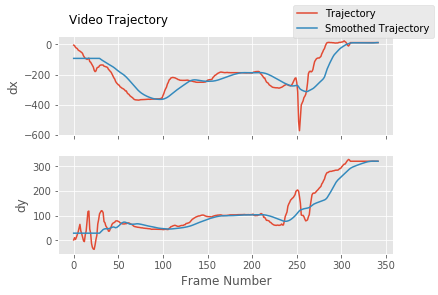

In [26]:
stabilizer.plot_trajectory()
plt.show()

## <font style="color:rgb(134,19,348)">   Video Stabilization On a Real Time Camera Feed. </font>
You can also perform stabilization on a single frame by using **`stabilizer.stabilize_frame()`** function, this way you can perform stabilization on live feed. Note there will be some delay which you will set by the `smoothing_window` variable, greater the window, greater the results but at the cost of more delay.

In [27]:
# Initilize the Video capture.
cap = cv2.VideoCapture(1)

stabilizer = VidStab()

while(True):
    
    # Read frame by frame of 
    ret, original   = cap.read()
    if not ret:
        break
    
    # Stabilized_frame will be an all black frame until iteration 30.
    stabilized = stabilizer.stabilize_frame(input_frame = original.copy(), smoothing_window = 30) 

    # Put text on both frames:
    cv2.putText(original,  'Original'  , (10,30), cv2.FONT_HERSHEY_COMPLEX, 1, (20,25,155), 2, cv2.LINE_AA)
    cv2.putText(stabilized,'Stabilized', (10,30), cv2.FONT_HERSHEY_COMPLEX, 1, (20,25,155), 2, cv2.LINE_AA)
        
    # Stacking both frames side by side
    stacked = np.hstack((original, stabilized))
    
    cv2.imshow('frame', stacked);
    if cv2.waitKey(50) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

### [You can read more about this library here](https://github.com/AdamSpannbauer/python_video_stab)

### [Library Documentation here](https://adamspannbauer.github.io/python_video_stab/html/index.html)